In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('improved_disease_dataset.csv')

In [ ]:
df.sample(5)

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
782,0,1,0,1,0,0,1,1,1,0,Tuberculosis
741,1,0,1,0,0,0,0,0,0,1,Cervical spondylosis
45,0,1,1,0,1,0,0,1,0,0,Paralysis (brain hemorrhage)
1741,1,0,0,0,0,0,0,0,0,1,Diabetes
1660,1,0,0,1,0,0,0,1,1,1,Psoriasis


In [ ]:
df['disease'].value_counts()

,count
disease,
Paralysis (brain hemorrhage),90
Hypertension,80
Hepatitis B,80
Impetigo,80
Chronic cholestasis,70
Hepatitis C,70
Typhoid,70
Dimorphic hemorrhoids(piles),70
Vertigo (Benign paroxysmal Positional Vertigo),70


In [ ]:
df.shape

(2000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fever        2000 non-null   int64 
 1   headache     2000 non-null   int64 
 2   nausea       2000 non-null   int64 
 3   vomiting     2000 non-null   int64 
 4   fatigue      2000 non-null   int64 
 5   joint_pain   2000 non-null   int64 
 6   skin_rash    2000 non-null   int64 
 7   cough        2000 non-null   int64 
 8   weight_loss  2000 non-null   int64 
 9   yellow_eyes  2000 non-null   int64 
 10  disease      2000 non-null   object
dtypes: int64(10), object(1)
memory usage: 172.0+ KB


In [ ]:
df.describe()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,0.328000,0.413000,0.378500,0.526000,0.365500,0.450500,0.387000,0.55500,0.456000,0.449000
std,0.469602,0.492496,0.485134,0.499448,0.481691,0.497668,0.487185,0.49709,0.498185,0.497517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


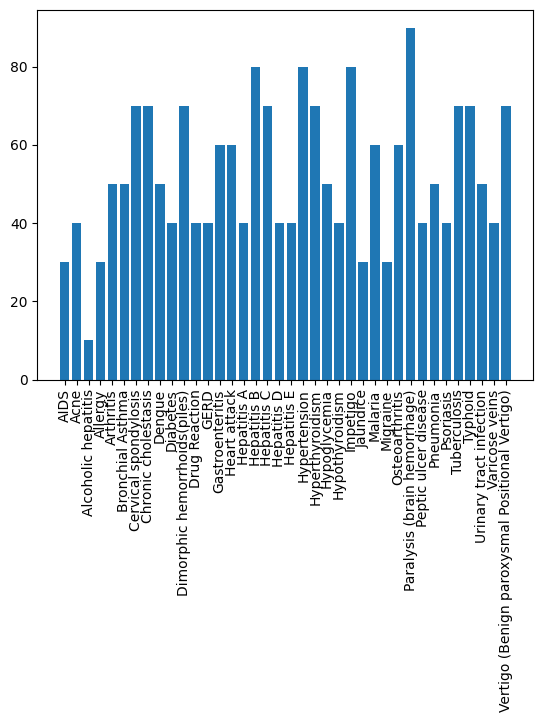

In [ ]:
X=df.drop('disease',axis=1)
Y=df['disease']
encoder=LabelEncoder()
Y=encoder.fit_transform(Y)
Y
plt.bar(encoder.classes_,np.bincount(Y))
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X.columns.tolist()
X.columns


Index(['fever', 'headache', 'nausea', 'vomiting', 'fatigue', 'joint_pain',
       'skin_rash', 'cough', 'weight_loss', 'yellow_eyes'],
      dtype='object')

In [ ]:
for col in df.columns:
    print(f"\n--- Value Counts for '{col}' ---")
    print(df[col].value_counts())


--- Value Counts for 'fever' ---
fever
0    1344
1     656
Name: count, dtype: int64

--- Value Counts for 'headache' ---
headache
0    1174
1     826
Name: count, dtype: int64

--- Value Counts for 'nausea' ---
nausea
0    1243
1     757
Name: count, dtype: int64

--- Value Counts for 'vomiting' ---
vomiting
1    1052
0     948
Name: count, dtype: int64

--- Value Counts for 'fatigue' ---
fatigue
0    1269
1     731
Name: count, dtype: int64

--- Value Counts for 'joint_pain' ---
joint_pain
0    1099
1     901
Name: count, dtype: int64

--- Value Counts for 'skin_rash' ---
skin_rash
0    1226
1     774
Name: count, dtype: int64

--- Value Counts for 'cough' ---
cough
1    1110
0     890
Name: count, dtype: int64

--- Value Counts for 'weight_loss' ---
weight_loss
0    1088
1     912
Name: count, dtype: int64

--- Value Counts for 'yellow_eyes' ---
yellow_eyes
0    1102
1     898
Name: count, dtype: int64

--- Value Counts for 'disease' ---
disease
Paralysis (brain hemorrhage)        

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)
model=LogisticRegression(max_iter=7)
model.fit(X_train,Y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=7)

In [ ]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print(test_data_accuracy)

0.4475
